Alessandro Beccani 931651
# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>


### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty as a function of the number of blocks.

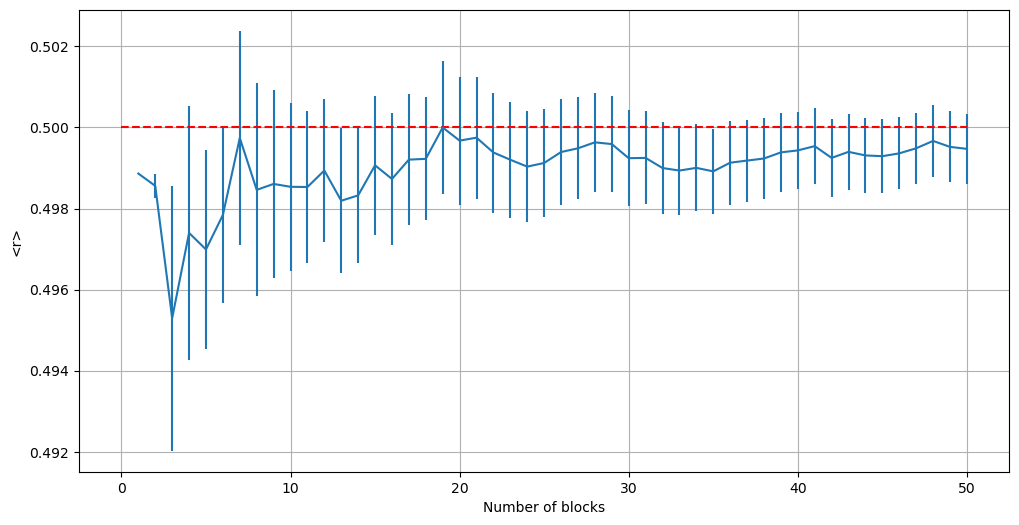

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def print_integral(file_path, y_expected, y_label, title):
	avg, sigma = np.loadtxt(file_path, unpack=True)
	lenght = len(avg)
	x_graph = np.linspace(1,lenght,lenght)
	plt.figure(figsize=(12,6))
	plt.title(title)
	plt.errorbar(x_graph, avg, yerr = sigma)
	plt.hlines(y_expected, 0, lenght, colors='r', linestyles='dashed')
	plt.grid(True)
	plt.xlabel('Number of blocks')
	plt.ylabel(y_label)
	plt.show()

print_integral('./OUTPUT/straight_integral_01.txt', 1/2, "<r>", "")

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty as a function of the number of blocks.

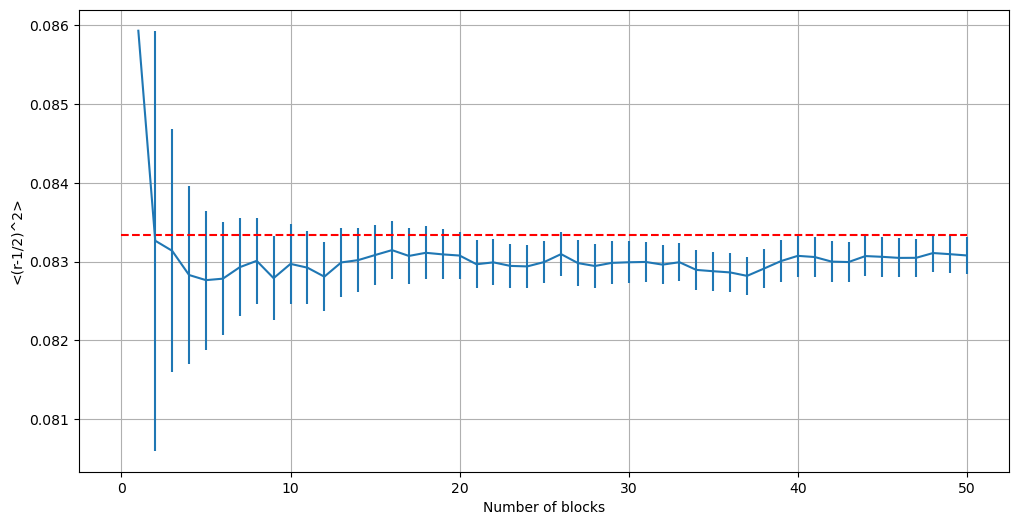

In [3]:
print_integral('./OUTPUT/parabolic_integral_01.txt', 1/12, "<(r-1/2)^2>", "")

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test.

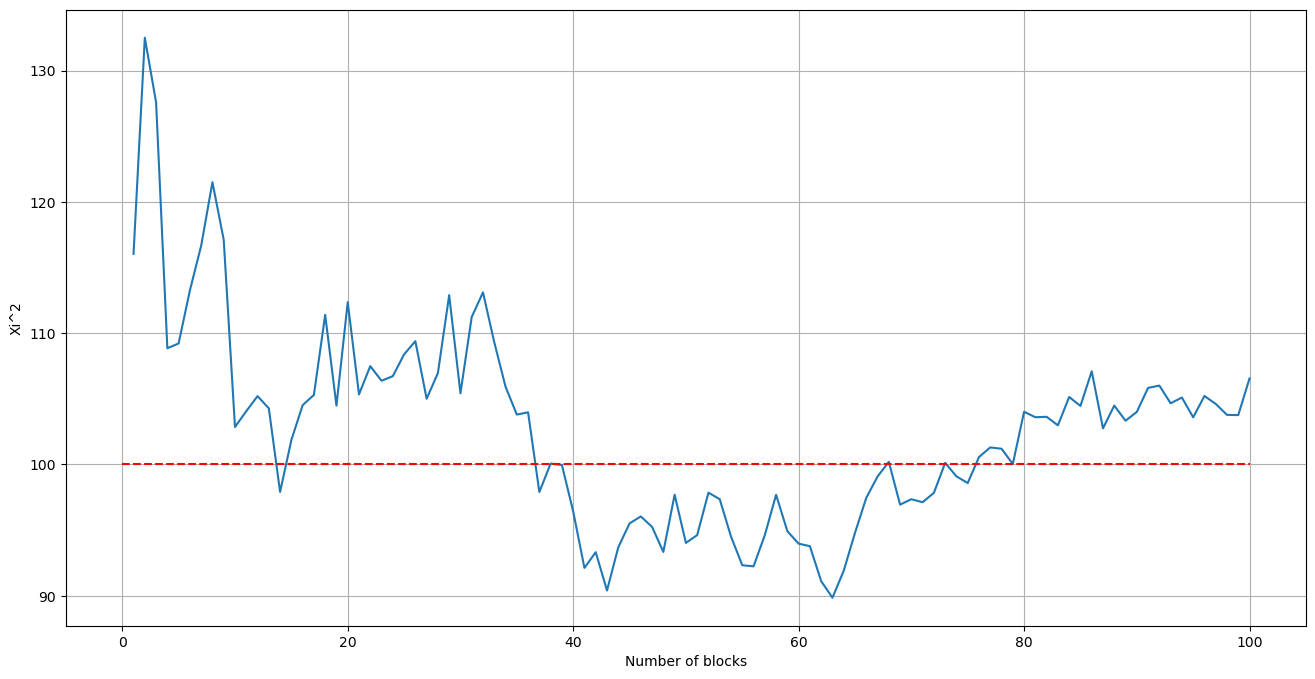

In [4]:
file_path = './OUTPUT/chi_data.txt'
Xi = np.loadtxt(file_path, unpack=True)
lenght = len(Xi)
x_graph = np.linspace(1,lenght,lenght)
plt.figure(figsize=(16,8))
plt.plot(x_graph, Xi)
plt.hlines(100, 0, 100, colors='r', linestyles='dashed')
plt.grid(True)
plt.xlabel('Number of blocks')
plt.ylabel("Xi^2")
plt.show()

Both the integrals and the $\chi^2$ test are compatible with the expected values (shown by the red line), which indicates that the random number generator is reliably uniform.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

Add two probability distributions by using the method of the inversion of the cumulative distribution to sample from a generic exponential distribution and a generic Cauchy-Lorentz distribution.
Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).


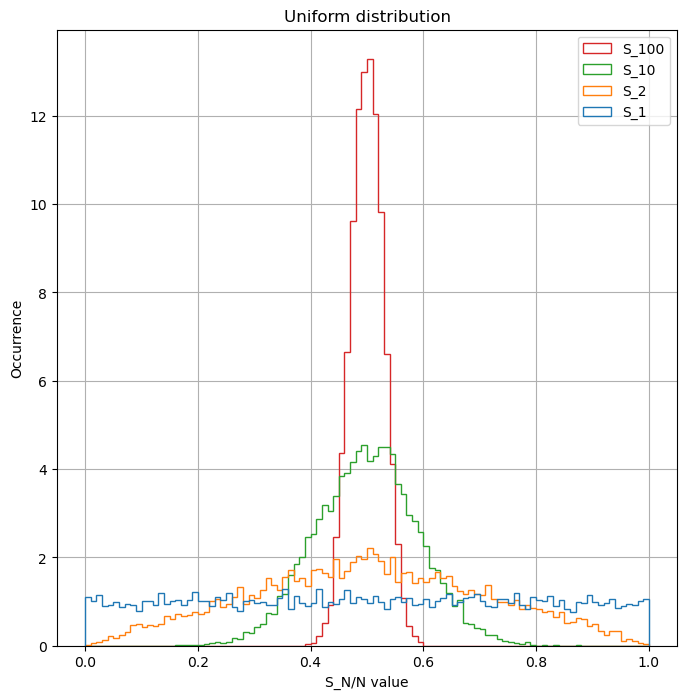

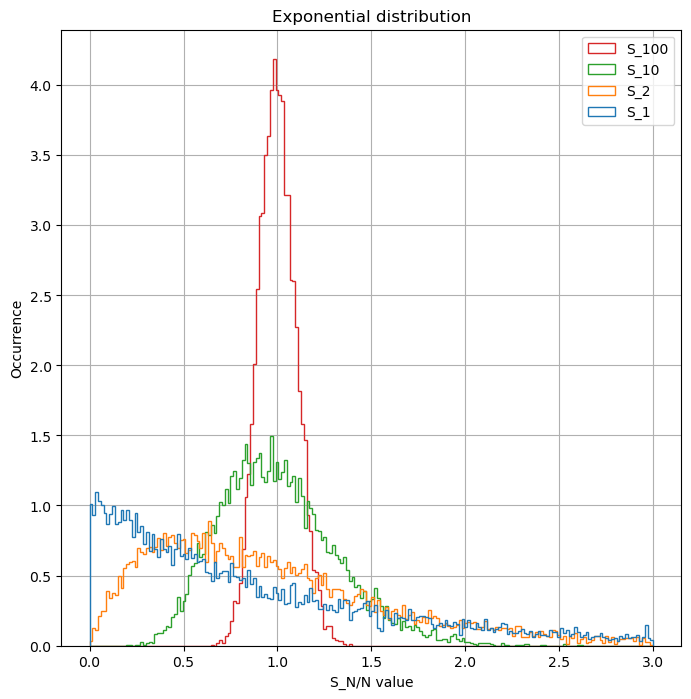

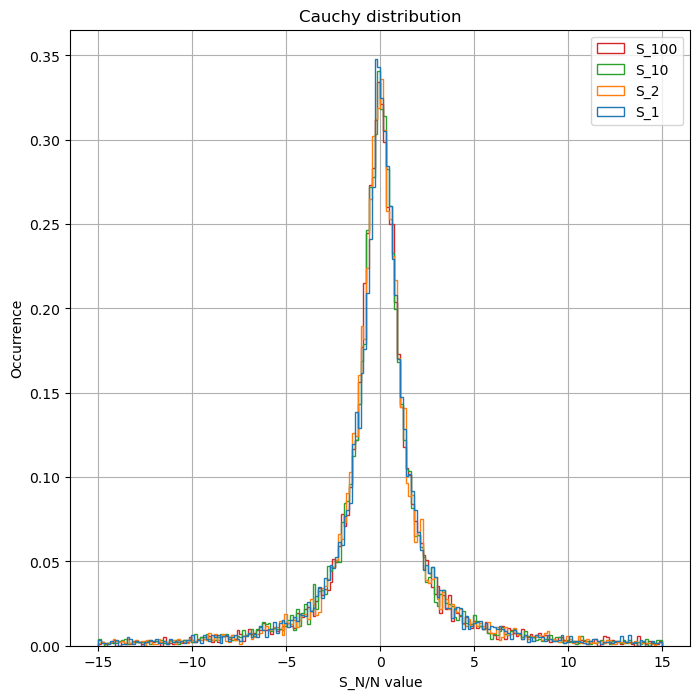

In [6]:
def print_distribution(file_path, _range, bins, title):
	data1, data2, data10, data100 = np.loadtxt(file_path, unpack=True)
	plt.figure(figsize=(8,8))
	plt.hist([data1, data2, data10, data100], bins, density=True, label=['S_1', 'S_2', 'S_10', 'S_100'], range=_range, histtype='step')
	plt.title(title)
	plt.grid(True)
	plt.legend ()
	plt.xlabel('S_N/N value')
	plt.ylabel('Occurrence')
	plt.show()

print_distribution( './OUTPUT/uniform.txt', ((0, 1)), 100, "Uniform distribution")
print_distribution( './OUTPUT/exponential.txt', ((0, 3)), 200, "Exponential distribution")
print_distribution( './OUTPUT/cauchy.txt', ((-15, 15)), 200, "Cauchy distribution")

As the plots show only the uniform and exponential distributions converges to the gaussian distribution, following the central limit theorem, while the Cauchy-Lorentz stays the same. Since the number generator was tested and it should provide identically distributed random variables, the difference is the finite variance of the former two: for the uniform distribution this is thanks to the finite domain, while for the exponential distribution this is due to the fast-decreasing tail (it goes without saying that it is decreasing exponentially). The Cauchy-Lorentz instead is fat-tailed and has an infinite domain, hence the non-finite variance.

### Exercise 01.3
- Simulate the Buffon’s experiment.
- Make a picture of the estimation of $\pi$ and its uncertainty with a large number of throws $M$ as a function of the number of blocks, If possible, do not use $\pi$ to evaluate $\pi$.

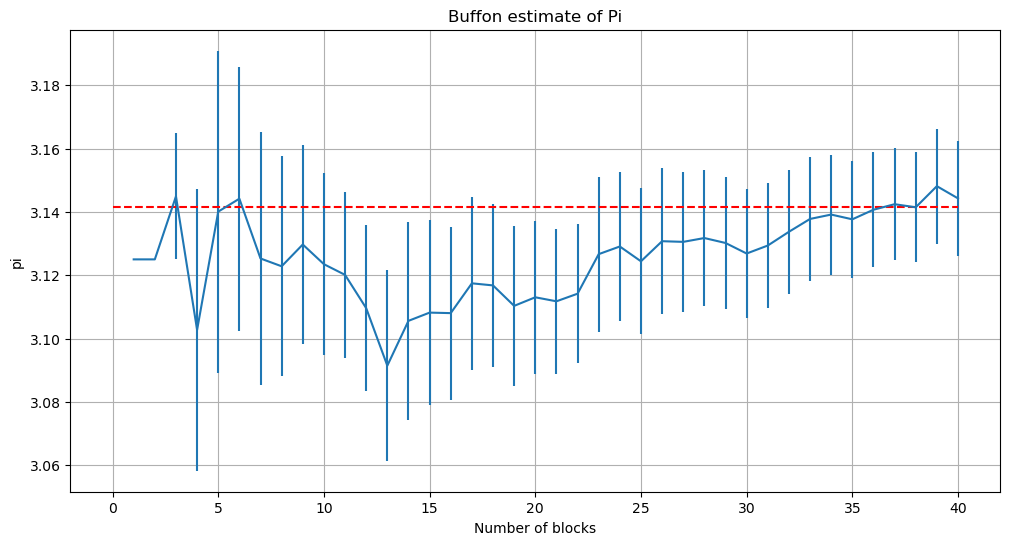

In [7]:
print_integral('./OUTPUT/PI_data.txt', np.pi, "pi","Buffon estimate of Pi")

The estimate was performed with $40$ Blocks sized $250$ throws, for a total of $M = 10^4$ simulated needle throws. The throws were simulated by sampling a uniformly distributed angle with a rejection technique, due to the request of sampling without explicitly using the known value of $\pi$.